In [2]:
import numpy as np
import pandas as pd


In [3]:
building_data=pd.read_csv("/kaggle/input/energy-prediction/building_metadata.csv")
weather_train=pd.read_csv("/kaggle/input/energy-prediction/weather_train.csv")
weather_test=pd.read_csv("/kaggle/input/energy-prediction/weather_test.csv")
train_data=pd.read_csv("/kaggle/input/energy-prediction/train.csv")

In [4]:
## Memory optimization

# Original code from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage by @gemartin
# Modified to support timestamp type, categorical type
# Modified to add option to use float16

from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [5]:
train_data = reduce_mem_usage(train_data, use_float16=True)
building_data = reduce_mem_usage(building_data, use_float16=True)
weather_train = reduce_mem_usage(weather_train, use_float16=True)
weather_test=reduce_mem_usage(weather_test, use_float16 = True)

Memory usage of dataframe is 616.95 MB


/tmp/ipykernel_34/3520823351.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_datetime(df[col]) or is_categorical_dtype(df[col]):
/tmp/ipykernel_34/3520823351.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_datetime(df[col]) or is_categorical_dtype(df[col]):
/tmp/ipykernel_34/3520823351.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_datetime(df[col]) or is_categorical_dtype(df[col]):
/tmp/ipykernel_34/3520823351.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_datetime(df[col]) or is_categorical_dtype(df[col]):
/tmp/ipykernel_34/3520823351

Memory usage after optimization is: 173.84 MB
Decreased by 71.8%
Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.02 MB
Decreased by 73.9%
Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 2.59 MB
Decreased by 73.1%
Memory usage of dataframe is 19.04 MB
Memory usage after optimization is: 5.13 MB
Decreased by 73.0%


/tmp/ipykernel_34/3520823351.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_datetime(df[col]) or is_categorical_dtype(df[col]):
/tmp/ipykernel_34/3520823351.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_datetime(df[col]) or is_categorical_dtype(df[col]):
/tmp/ipykernel_34/3520823351.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_datetime(df[col]) or is_categorical_dtype(df[col]):
/tmp/ipykernel_34/3520823351.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_datetime(df[col]) or is_categorical_dtype(df[col]):
/tmp/ipykernel_34/3520823351

In [6]:
building_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [7]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609


In [8]:
train_data.head()


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [9]:
data_train=pd.merge(train_data,building_data, on="building_id",how='left')


data_train = pd.merge(data_train, weather_train, on=["site_id", "timestamp"], how='left').drop(columns=["meter","site_id","year_built"]).groupby(["building_id","timestamp"]).agg({"meter_reading":"sum",
       'primary_use':"first", 'square_feet':"first", 'air_temperature':"first",
       'cloud_coverage':"first", 'dew_temperature':"first", 'precip_depth_1_hr':"first",
       'sea_level_pressure':"first", 'wind_direction':"first", 'wind_speed':"first"}).reset_index()

/tmp/ipykernel_34/516405660.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_train = pd.merge(data_train, weather_train, on=["site_id", "timestamp"], how='left').drop(columns=["meter","site_id","year_built"]).groupby(["building_id","timestamp"]).agg({"meter_reading":"sum",


In [10]:
holidays = ["2016-01-01", "2016-01-18", "2016-02-15", "2016-05-30", "2016-07-04",
                "2016-09-05", "2016-10-10", "2016-11-11", "2016-11-24", "2016-12-26",
                "2017-01-01", "2017-01-16", "2017-02-20", "2017-05-29", "2017-07-04",
                "2017-09-04", "2017-10-09", "2017-11-10", "2017-11-23", "2017-12-25",
                "2018-01-01", "2018-01-15", "2018-02-19", "2018-05-28", "2018-07-04",
                "2018-09-03", "2018-10-08", "2018-11-12", "2018-11-22", "2018-12-25",
                "2019-01-01"]
data_train.timestamp = pd.to_datetime(data_train.timestamp, format="%Y-%m-%d %H:%M:%S")
data_train["weekday"] = data_train.timestamp.dt.weekday
data_train["is_holiday"] = (data_train.timestamp.dt.date.astype("str").isin(holidays)).astype(int)

In [11]:
data_train

,building_id,timestamp,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,weekday,is_holiday
0,0,2016-01-01 00:00:00,0.000,Education,7432.0,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000,4,1
1,0,2016-01-01 01:00:00,0.000,Education,7432.0,24.406250,NaN,21.093750,-1.0,1020.0,70.0,1.500000,4,1
2,0,2016-01-01 02:00:00,0.000,Education,7432.0,22.796875,2.0,21.093750,0.0,1020.0,0.0,0.000000,4,1
3,0,2016-01-01 03:00:00,0.000,Education,7432.0,21.093750,2.0,20.593750,0.0,1020.0,0.0,0.000000,4,1
4,0,2016-01-01 04:00:00,0.000,Education,7432.0,20.000000,2.0,20.000000,-1.0,1020.0,250.0,2.599609,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12728011,1448,2016-12-31 19:00:00,3.400,Office,92271.0,3.000000,NaN,-8.000000,NaN,NaN,180.0,5.699219,5,0
12728012,1448,2016-12-31 20:00:00,2.700,Office,92271.0,2.800781,2.0,-8.898438,NaN,1007.5,180.0,7.699219,5,0
12728013,1448,2016-12-31 21:00:00,3.050,Office,92271.0,2.800781,NaN,-7.199219,NaN,1007.5,180.0,5.101562,5,0
12728014,1448,2016-12-31 22:00:00,3.125,Office,92271.0,2.199219,NaN,-6.699219,NaN,1008.0,170.0,4.601562,5,0


            timestamp  meter_reading  square_feet  air_temperature  \
0 2016-01-01 00:00:00            0.0       7432.0        25.000000   
1 2016-01-01 01:00:00            0.0       7432.0        24.406250   
2 2016-01-01 02:00:00            0.0       7432.0        22.796875   
3 2016-01-01 03:00:00            0.0       7432.0        21.093750   
4 2016-01-01 04:00:00            0.0       7432.0        20.000000   
5 2016-01-01 05:00:00            0.0       7432.0        19.406250   
6 2016-01-01 06:00:00            0.0       7432.0        21.093750   
7 2016-01-01 07:00:00            0.0       7432.0        21.093750   
8 2016-01-01 08:00:00            0.0       7432.0        20.593750   
9 2016-01-01 09:00:00            0.0       7432.0        21.093750   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0         20.00000                NaN              1019.5   
1             NaN         21.09375               -1.0              1020.0  

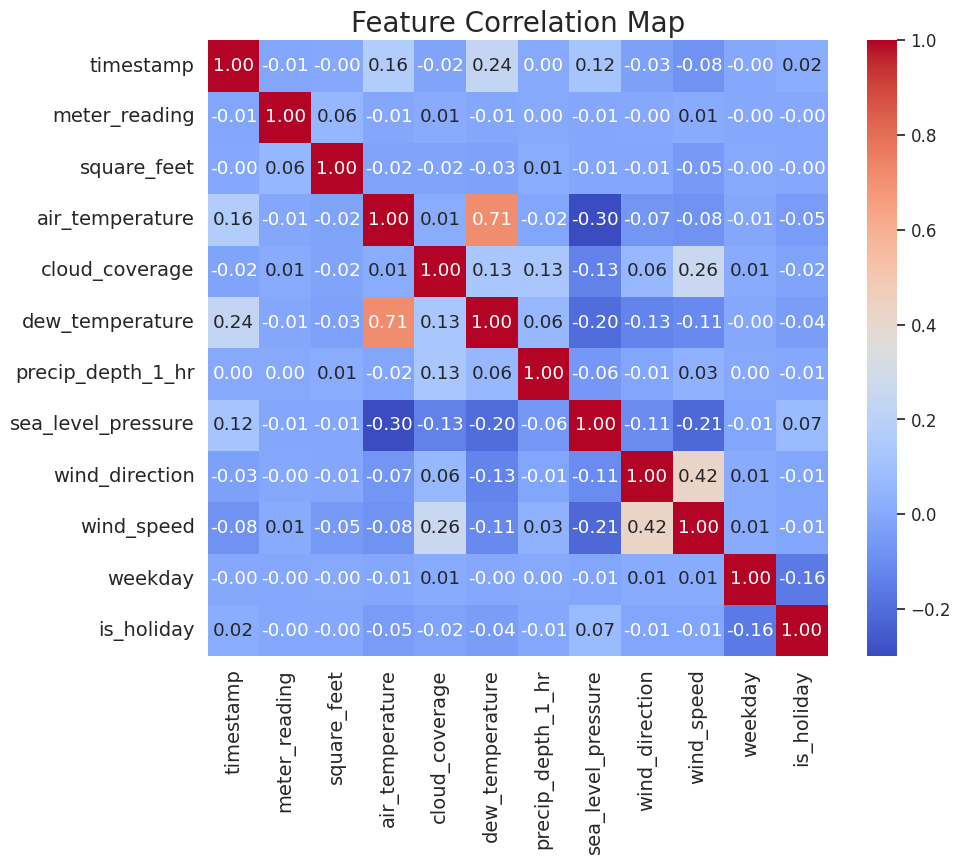

In [14]:
ds = data_train[data_train["primary_use"]== "Education"]
ds = ds.drop(columns=["primary_use","building_id"])
print(ds.head(10))
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.1)
corr_matrix = ds.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Map', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('correlation_map.png', dpi=400, bbox_inches='tight') 
plt.show()

In [ ]:
data_train=data_train.drop(columns=[ "sea_level_pressure", "wind_direction", "wind_speed"])

In [ ]:
data_train.square_feet = np.log1p(data_train.square_feet)
data_train.meter_reading = np.log1p(data_train.meter_reading)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_train[["square_feet","air_temperature","dew_temperature","meter_reading"]] = scaler.fit_transform(data_train[["square_feet","air_temperature","dew_temperature","meter_reading"]])


In [ ]:
data_train["precip_depth_1_hr"]=data_train["precip_depth_1_hr"].fillna(0)

In [ ]:
# data_train=data_train.dropna()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data_train["primary_use"] = data_train["primary_use"].astype(str)
label_encoder = LabelEncoder()
data_train['primary_use_encoded'] = label_encoder.fit_transform(data_train['primary_use'])



In [ ]:
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    
    non_zero_indices = y_test != 0
    y_test_non_zero = y_test[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    
    mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100
    
    return mape

In [ ]:
# data_train = data_train[data_train['meter_reading'] != 0]

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 10))
# plt.plot(data_train[3377:3420]["timestamp"],data_train[3377:3420]["meter_reading"])
# plt.plot(data_train[3377:3420]["timestamp"],data_train[3377:3420]["is_weekend"])
# plt.show()

In [ ]:
data_train=data_train.dropna()

In [ ]:
data_train1=data_train.copy()

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    elif month in [9, 10, 11]:
        return 4

In [ ]:
# data_train1[(data_train1["building_id"]==0)&(data_train1["season"]=="Spring")]

In [ ]:
data_train["meter_reading"]

In [ ]:
data_train["meter_reading"].describe()

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
building_id = data_train1["building_id"].unique()[0]
df_filtered = data_train1[(data_train1["primary_use"] == "Education") & (data_train1["building_id"] == building_id)].copy()
df_filtered["month"] = df_filtered["timestamp"].dt.month
df_filtered["is_summer_holiday"] = df_filtered.apply(lambda x: 1 if x["month"] in [1, 2, 3, 4] or (x["month"] == 5 and x["timestamp"].day <= 20) else 0, axis=1)
df_filtered=df_filtered[df_filtered["is_summer_holiday"]==0]
df = df_filtered[["timestamp", "meter_reading"]]
df.rename(columns={"timestamp": "ds", "meter_reading": "y"}, inplace=True)

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=50)
future.tail()
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
fig1 = m.plot(forecast)
plt.savefig('forecast_plot.png')
fig2 = m.plot_components(forecast)
plt.savefig('seasonal_trends_plot.png')

In [ ]:
mape_1=[]
r2_1=[]
mse_1=[]
mape_2=[]
r2_2=[]
mse_2=[]
ids=[]
for i in data_train1[data_train1["primary_use"] == "Education"]["building_id"].unique():
    if i in [191,258,419,492,499,590,723,724,738,757,1011,1226,1233,1234,1264,1278,1354]:
        continue
    if i not in [14]:
        continue
    data_train=data_train1[data_train1["building_id"]==i].copy()
    data_train["month"] = data_train["timestamp"].dt.month
    data_train["is_summer_holiday"] = data_train.apply(lambda x: 1 if x["month"] in [1, 2, 3, 4] or (x["month"] == 5 and x["timestamp"].day <= 20) else 0, axis=1)
    data_train["hour"] = data_train["timestamp"].dt.hour
    data_train['is_weekend'] = (data_train['timestamp'].dt.dayofweek >= 5).astype(int)
#     data_train["is_school_hour"]=data_train["hour"].apply(lambda x: 1 if x in [9,10,11,12,13,14,15,16,17,18,19] else 0)

    if len(data_train)<2000:
        continue
    y=data_train["meter_reading"]
    X=data_train.drop(columns=["air_temperature","meter_reading","primary_use","cloud_coverage",'precip_depth_1_hr','primary_use_encoded'])

    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X.drop(columns="dew_temperature"), y, test_size=0.2, random_state=42,shuffle=False)
        
    X_test['y_test'] = y_test
    X_test = X_test.sort_values(by="timestamp")
    y_test = X_test.pop('y_test')
#     print(X_test.columns)
    
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    dt = DecisionTreeRegressor(criterion='poisson',splitter='best',max_depth=40,max_features=1.0,min_samples_split=30,)
    dt.fit(X_train.drop(columns=["timestamp","building_id"]), y_train)
    y_pred = dt.predict(X_test.drop(columns=["timestamp","building_id"]))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_1.append(mape)
    r2_1.append(r2)
    mse_1.append(mse)
    ids.append(X_test["building_id"][:1])
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(X_test["timestamp"][290:530],y_test[290:530])
    plt.plot(X_test["timestamp"][290:530],y_pred[290:530])
    plt.savefig(f'plot_dsc{i}')
    plt.xlabel('Time', fontsize=20)  # Increase font size of x-axis label
    plt.ylabel('Meter Readings', fontsize=20)  # Increase font size of y-axis label
    plt.xticks(fontsize=14.5)  # Increase font size of x-tick labels
    plt.yticks(fontsize=16)
    plt.show()
    print(i)
    print(mape)
        
    
    from sklearn.svm import SVR
    svr=SVR(gamma=0.081,C=6,epsilon=0.11)#kernel="linear"
    svr.fit(X_train.drop(columns=["timestamp"]), y_train)
    y_pred1 = svr.predict(X_test.drop(columns=["timestamp"]))
    mse1 = mean_squared_error(y_test, y_pred1)
    r21 = r2_score(y_test, y_pred1)
    mape1 = mean_absolute_percentage_error(y_test, y_pred1)
    mape_2.append(mape1)
    r2_2.append(r21)
    mse_2.append(mse1)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(X_test["timestamp"][290:530],y_test[290:530])
    plt.plot(X_test["timestamp"][290:530],y_pred1[290:530])
    plt.xlabel('Time', fontsize=20)  # Increase font size of x-axis label
    plt.ylabel('Meter Readings', fontsize=20)  # Increase font size of y-axis label
    plt.xticks(fontsize=14.5)  # Increase font size of x-tick labels
    plt.yticks(fontsize=16)
    plt.savefig(f'plot_svr_{i}')
    plt.show()
    print(i)
    print(mape1)
        
    
  
print("dsc")
print(np.mean(np.array(mape_1)))
print(np.mean(np.array(r2_1)))
print(np.mean(np.array(mse_1)))
print("svr")
print(np.mean(np.array(mape_2)))
print(np.mean(np.array(r2_2)))
print(np.mean(np.array(mse_2)))

In [ ]:
# ids[232]

In [ ]:
for i in range(len(mape_1)):
    if mape_1[i] >60  :
        print(mape_1[i])
        print(ids[i])
        

In [ ]:
len(ids)

In [ ]:
pd.Series(r2_2).count()

In [ ]:
r2_1=(pd.Series(r2_1)>0)
r2_2=(pd.Series(r2_2)>0)

In [ ]:
r2_2.count()

In [ ]:
print(r2_2.mean())
print(r2_1.mean())

In [ ]:
mape_1=[]
r2_1=[]
mse_1=[]
mape_2=[]
r2_2=[]
mse_2=[]
ids2=[]
for i in data_train1[data_train1["primary_use"] == "Education"]["building_id"].unique():
    if i in [0,1,4,5,11,16,52,54,86,94,314,634,636,709,714,736,737,739,954,954,191,258,419,492,499,590,723,724,738,757,1011,1226,1233,1234,1264,1278,1354]:
        continue
    if i not in [14]:
        continue
    data_train=data_train1[data_train1["building_id"]==i].copy()
    data_train["month"] = data_train["timestamp"].dt.month
    data_train["is_summer_holiday"] = data_train.apply(lambda x: 1 if x["month"] in [1, 2, 3, 4] or (x["month"] == 5 and x["timestamp"].day <= 20) else 0, axis=1)
    data_train["hour"] = data_train["timestamp"].dt.hour
    data_train['is_weekend'] = (data_train['timestamp'].dt.dayofweek >= 5).astype(int)
    data_train["season"]=data_train["month"].apply(get_season)
    if len(data_train)<2000:
        continue
    for j in data_train["season"].unique():
#         print(j)
        if j not in [4]:
            continue
        data_train2=data_train[data_train["season"]==j].copy()
#     data_train["is_school_hour"]=data_train["hour"].apply(lambda x: 1 if x in [9,10,11,12,13,14,15,16,17,18,19] else 0)
    
        y=data_train2["meter_reading"]
        X=data_train2.drop(columns=["season","building_id","meter_reading","primary_use","cloud_coverage",'precip_depth_1_hr','primary_use_encoded'])

        from sklearn.model_selection import train_test_split
        
        X_train, X_test, y_train, y_test = train_test_split(X.drop(columns="dew_temperature"), y, test_size=0.2, random_state=42,shuffle=False)

        from sklearn.tree import DecisionTreeRegressor
        from sklearn.metrics import mean_squared_error, r2_score
        dt = DecisionTreeRegressor(criterion='poisson',splitter='best',max_depth=40,min_samples_split=85,min_samples_leaf=1,)
        try:
            dt.fit(X_train.drop(columns=["timestamp"]), y_train)
        except:
            continue
        y_pred = dt.predict(X_test.drop(columns=["timestamp"]))
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_1.append(mape)
        r2_1.append(r2)
        mse_1.append(mse)
        ids2.append(i)
        
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        plt.plot(X_test["timestamp"],y_test)
        plt.plot(X_test["timestamp"],y_pred)
        plt.xlabel('Time', fontsize=20)  # Increase font size of x-axis label
        plt.ylabel('Meter Readings', fontsize=20)  # Increase font size of y-axis label
        plt.xticks(fontsize=14.5)  # Increase font size of x-tick labels
        plt.yticks(fontsize=16)
        plt.savefig(f'plot_dsc_seasonal_{i}_{j}')
        plt.show()
        print(i)
        print(mape)
        

        from sklearn.svm import SVR
        svr=SVR(gamma=0.081,C=6,epsilon=0.11 )#kernel="linear"
        svr.fit(X_train.drop(columns=["timestamp"]), y_train)
        y_pred1 = svr.predict(X_test.drop(columns=["timestamp"]))
        mse1 = mean_squared_error(y_test, y_pred1)
        r21 = r2_score(y_test, y_pred1)
        mape1 = mean_absolute_percentage_error(y_test, y_pred1)
        mape_2.append(mape1)
        r2_2.append(r21)
        mse_2.append(mse1)
        
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        plt.plot(X_test["timestamp"],y_test)
        plt.plot(X_test["timestamp"],y_pred1)
        plt.xlabel('Time', fontsize=20)  # Increase font size of x-axis label
        plt.ylabel('Meter Readings', fontsize=20)  # Increase font size of y-axis label
        plt.xticks(fontsize=14.5)  # Increase font size of x-tick labels
        plt.yticks(fontsize=16)  # Increase font size of y-tick labels

        plt.savefig(f'plot_svr_seasonal_{i}_{j}')
        plt.show()
        print(i)
        print(mape1)
        
    
  
print("dsc")
print(np.mean(np.array(pd.Series(mape_1).dropna())))
print(np.mean(np.array(r2_1)))
print(np.mean(np.array(mse_1)))
print("svr")
print(np.mean(np.array(pd.Series(mape_2).dropna())))
print(np.mean(np.array(r2_2)))
print(np.mean(np.array(mse_2)))

In [ ]:
for i in range(len(mape_1)):
    if mape_1[i] >80:
#         print(mape_1[i])
        print(ids2[i],end=',')
        

In [ ]:
pd.Series(r2_2).count()

In [ ]:
r2_1=(pd.Series(r2_1)>0)
r2_2=(pd.Series(r2_2)>0)

In [ ]:
r2_2.count()

In [ ]:
print(r2_2.mean())
print(r2_1.mean())

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation,SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam , Nadam  ,RMSprop, SGD


# model = Sequential([
#     Dense(1024, activation='relu', input_shape=(X_train.shape[1],)), 
#     BatchNormalization(),  
#     Dense(512, activation='relu'), 
#     BatchNormalization(), 
#     Dense(512, activation='relu'), 
#     BatchNormalization(), 
#     Dense(256, activation='relu'), 
#     BatchNormalization(), 
#     Dense(256, activation='relu'), 
#     BatchNormalization(),  
#     Dense(128, activation='relu'), 
#     BatchNormalization(), 
#     Dense(64, activation='relu'), 
#     BatchNormalization(), 
#     Dense(32, activation='relu'), 
#     Dense(1) 
# ])

# model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mape')
# model.summary()

# checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

# history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test),callbacks=[checkpoint, early_stopping])
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# import tensorflow as tf
# model=tf.keras.models.load_model('best_model.keras')

# print(model.evaluate(X_test, y_test))

# y_pred = model.predict(X_test)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# print(f"nueral network - Mean Squared Error: {mse}")
# print(f"nueral network - R^2 Score: {r2}")


In [ ]:
mape_3=[]
r2_3=[]
mse_3=[]
ids3=[]
for i in data_train1[data_train1["primary_use"] == "Education"]["building_id"].unique():
    if i in [191,258,419,492,499,723,738,757,1011,1226,1234,1264,1278,1354]:
        continue
    if i not in [14]:
        continue
    
    data_train=data_train1[data_train1["building_id"]==i].copy()
    data_train=data_train[data_train['meter_reading']!=0]
    data_train["month"] = data_train["timestamp"].dt.month
    if i == 20:
        data_train=data_train[data_train['month']>=6]
    data_train["is_summer_holiday"] = data_train.apply(lambda x: 1 if x["month"] in [1, 2, 3, 4] or (x["month"] == 5 and x["timestamp"].day <= 20) else 0, axis=1)
#     data_train=data_train[data_train["is_summer_holiday"]==0]
    data_train["hour"] = data_train["timestamp"].dt.hour
    data_train['is_weekend'] = (data_train['timestamp'].dt.dayofweek >= 5).astype(int)
    data_train["is_school_hour"]=data_train["hour"].apply(lambda x: 1 if x in [9,10,11,12,13,14,15,16,17,18,19] else 0)
    data_train["season"]=data_train["month"].apply(get_season)
    if len(data_train)<2000:
        continue
        
    y=data_train["meter_reading"]
    X=data_train.drop(columns=["building_id","meter_reading","primary_use","cloud_coverage",'precip_depth_1_hr','primary_use_encoded'])

    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42,shuffle=False)
    
    model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.drop(columns=["timestamp"]).shape[1],)), 
    BatchNormalization(),  
    Dense(128, activation='relu'), 
    BatchNormalization(), 
    Dense(64, activation='relu'), 
    BatchNormalization(), 
    Dense(32, activation='relu'), 
    BatchNormalization(), 
    Dense(1) 
    ])

    model.compile(optimizer=Nadam(learning_rate=0.001), loss='mape')
#     model.summary()

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=0)

    history = model.fit(X_train.drop(columns=["timestamp"]), y_train, epochs=300, batch_size=25, validation_data=(X_test.drop(columns=["timestamp"]), y_test),callbacks=[checkpoint, early_stopping],verbose=1)

    import tensorflow as tf
    model=tf.keras.models.load_model('best_model.keras')

#     print(model.evaluate(X_test, y_test))

    y_pred = model.predict(X_test.drop(columns=["timestamp"]))
    mape = mean_absolute_percentage_error(y_test[50:290], y_pred[50:290])
    mse = mean_squared_error(y_test[50:290], y_pred[50:290])
    r2 = r2_score(y_test, y_pred)
    mape_3.append(mape)
    r2_3.append(r2)
    mse_3.append(mse)

    import matplotlib.pyplot as plt
    plt.plot(X_train["timestamp"],y_train)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(X_test["timestamp"][50:290],y_test[50:290])
    plt.plot(X_test["timestamp"][50:290],y_pred[50:290])
    plt.xlabel('Time', fontsize=20)  # Increase font size of x-axis label
    plt.ylabel('Meter Readings', fontsize=20)  # Increase font size of y-axis label
    plt.xticks(fontsize=14.5)  # Increase font size of x-tick labels
    plt.yticks(fontsize=16)
    plt.savefig(f'plot_nn_{i}')
    plt.show()
    print(i)
    print(mape)
        
    
  

print(np.mean(np.array(pd.Series(mape_3).dropna())))
print(np.mean(np.array(r2_3)))
print(np.mean(np.array(mse_3)))

In [ ]:
print(np.mean(np.array(pd.Series(mape_3).dropna())))

In [ ]:
for i in mape_3:
    if i>60:
        print(i)

In [ ]:
len(mape_3)

In [ ]:
# 11.169721161325773
# 7.317089824937284
# 8.994578298759357
#20.34212289827651
#9.291486726261866
#6.605345773435122
#11.522009950376264
# 20.00049329083413
#21.4344
#12.09

In [ ]:
12.8